## Research question
Our research question is “How does a song’s popularity spread over countries over time, and how much of that is attributed to the lyrics / word patterns in that song?”

## Why it is important to you, why it matters to others, and what is at stake
Music is something that everyone connects to, and our group wants to find a way to measure how and why music is spread across the world. It’s a way for musicians to figure out which kind of music allows them to connect with different audiences and cross cultural and linguistic barriers. It’s also a way for us as listeners to help determine what connects us to certain kinds of music, what word frequencies and thematic patterns matter most to us, and what cultural practices and norms cause certain groups to listen (or not to listen) to certain types of music. Essentially, it’s a way to determine what connects us all!

## A preliminary but definitive description of data sources that you will use
The first data source is from Spotify Charts. Spotify Charts is a website from the popular music streaming app, Spotify. Spofity constantly keeps ranking of how often songs are streamed from their uses, and keeps track of which songs are streamed the most. Spotify also separates these streaming counts by country. The top 200 songs of each day or week and their total streams are available to download in csv format from Spotify Charts. The data can be found at https://spotifycharts.com/. 

The second data source will be song lyrics. These can be found on genius.com, and we will be copying and pasting the text lyrics from those websites to perform text analysis. https://genius.com/

## Scope
For our project, we plan on having line charts charting a songs popularity by country over time (by plotting number of streams vs time). We plan on looking at multiple countries in comparison, so our hope is to have many countries together on the same chart. 

We also plan on seeing if there are geographical relations between songs popularity in certain countries, so something such as a map with the song's number of streams overlaid over the country, and each chart representing a different period in time would be interesting too. 

Lastly, we plan on doing text analysis on the lyrics versus the popularity in a certain country, so we may have frequency charts of words found in the song, as well as potentially some graphic showing sentiment analysis for the song lyric text. 

## Conclusion
Overall, by utilizing the data sources provided by Spotify Charts and Genius to create easy to read visualizations, we hope to find patterns in song popularity across different countries and look into whether certain lyrics are correlated with popularity within the top few songs. We also hope to find out how streaming of certain songs compare across different countries and whether or not the same songs trend at the same rate. 


In [45]:
import pandas as pd
import os
import glob
import datetime

path = os.getcwd()
path = os.path.join(path, "Data", "*.csv")
csv_files = glob.glob(path)
# loop over the list of csv files
weekly_global_charts = pd.DataFrame()

for f in csv_files:
    
    filename = os.path.basename(f)
    # read the csv file
    df = pd.read_csv(f)
      

    date_time_obj = datetime.datetime.strptime(filename[23:-4], '%Y-%m-%d')

    df["date"] = date_time_obj
    
    weekly_global_charts= weekly_global_charts.append(df)


In [47]:
weekly_global_charts.head()
len(weekly_global_charts)

2600

In [51]:
heat_waves = weekly_global_charts.loc[lambda df: df["track_name"] == "Heat Waves"]
heat_waves.head()


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
2,3,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,3,10,54,28387947,2022-01-06
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,2,57,30110762,2022-01-27
1,2,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,2,4,56,29386724,2022-01-20
6,7,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,3,6,51,26030908,2021-12-16
0,1,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,1,1,59,31668100,2022-02-10


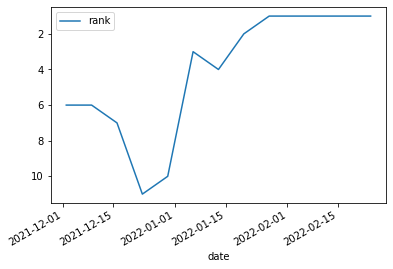

In [52]:
heat_waves.plot(x='date', y='rank').invert_yaxis()